In [6]:
import pandas as pd

# Load dataset
df = pd.read_csv("../data/student-mat.csv",sep=";")

# Show first 5 rows
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [7]:
df.shape


(395, 33)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [9]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [10]:
df["G3"].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

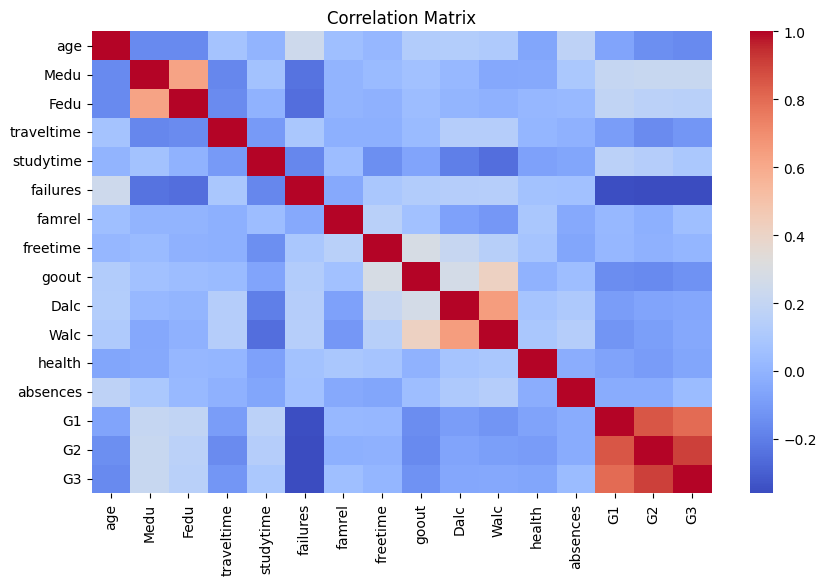

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [12]:
df = df.drop(["G1", "G2"], axis=1)

In [13]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G3'],
      dtype='object')

In [14]:
X = df.drop("G3", axis=1)
y = df["G3"]

In [15]:
cat_cols = X.select_dtypes(include="object").columns
num_cols = X.select_dtypes(exclude="object").columns

print("Categorical columns:", len(cat_cols))
print("Numerical columns:", len(num_cols))

Categorical columns: 17
Numerical columns: 13


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)

Training size: (316, 30)
Testing size: (79, 30)


In [18]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Identify categorical and numerical columns
cat_cols = X.select_dtypes(include="object").columns
num_cols = X.select_dtypes(exclude="object").columns

# Preprocessing for numeric data
num_transformer = StandardScaler()

# Preprocessing for categorical data
cat_transformer = OneHotEncoder(handle_unknown="ignore")

# Combine preprocessors
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_cols),
        ("cat", cat_transformer, cat_cols)
    ]
)

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [21]:
from sklearn.metrics import mean_squared_error, r2_score

# Predictions
y_pred = model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 17.603737398324714
R2 Score: 0.14149247411195787


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

In [23]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

In [24]:
results = {}

for name, reg in models.items():
    pipe = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("regressor", reg)
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = r2

results

{'Linear Regression': 0.14149247411195787,
 'Decision Tree': -0.14142937517581955,
 'Random Forest': 0.30734133169755884}

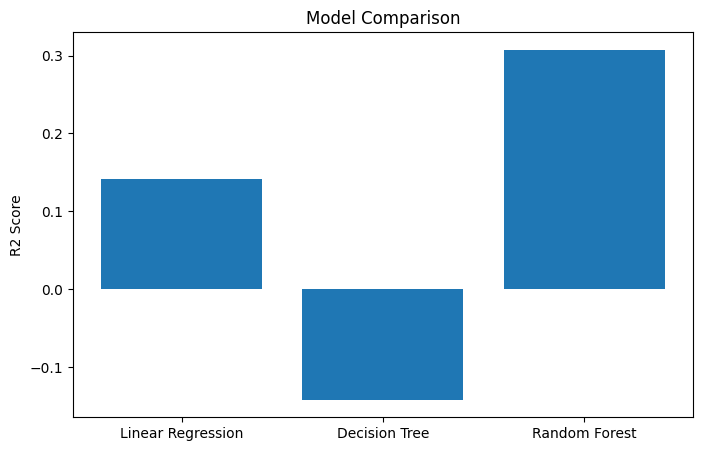

In [25]:
import matplotlib.pyplot as plt

model_names = list(results.keys())
r2_scores = list(results.values())

plt.figure(figsize=(8,5))
plt.bar(model_names, r2_scores)
plt.ylabel("R2 Score")
plt.title("Model Comparison")
plt.show()

In [26]:
# Convert target to Pass/Fail
df_class = df.copy()
df_class["G3"] = df_class["G3"].apply(lambda x: 1 if x >= 10 else 0)

df_class["G3"].value_counts()

G3
1    265
0    130
Name: count, dtype: int64

In [27]:
# Create classification copy
df_class = df.copy()

# Convert G3 to binary (Pass = 1, Fail = 0)
df_class["G3"] = df_class["G3"].apply(lambda x: 1 if x >= 10 else 0)

df_class["G3"].value_counts()

G3
1    265
0    130
Name: count, dtype: int64

In [28]:
X = df_class.drop("G3", axis=1)
y = df_class["G3"]

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

results = {}

for name, clf in models.items():
    pipe = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", clf)
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }

results

{'Logistic Regression': {'Accuracy': 0.7341772151898734,
  'Precision': 0.7540983606557377,
  'Recall': 0.8846153846153846,
  'F1 Score': 0.8141592920353983},
 'Decision Tree': {'Accuracy': 0.6582278481012658,
  'Precision': 0.711864406779661,
  'Recall': 0.8076923076923077,
  'F1 Score': 0.7567567567567568},
 'Random Forest': {'Accuracy': 0.6835443037974683,
  'Precision': 0.684931506849315,
  'Recall': 0.9615384615384616,
  'F1 Score': 0.8}}

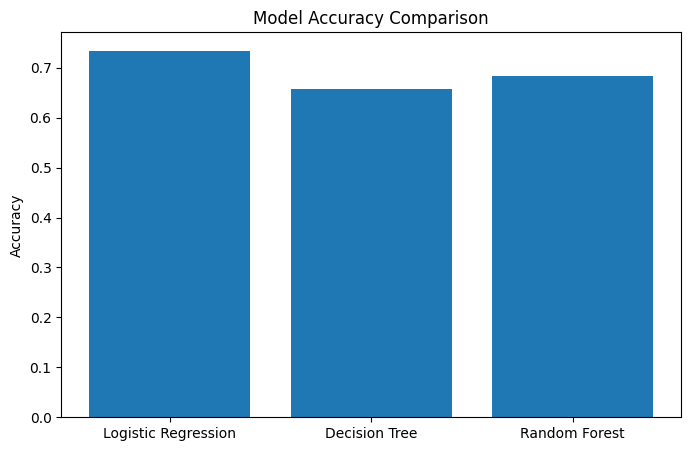

In [32]:
import matplotlib.pyplot as plt

model_names = list(results.keys())
accuracies = [results[m]["Accuracy"] for m in model_names]

plt.figure(figsize=(8,5))
plt.bar(model_names, accuracies)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score

results = {}

for name, clf in models.items():
    pipe = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", clf)
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "R2": r2_score(y_test, y_pred)
    }

results

{'Logistic Regression': {'Accuracy': 0.7341772151898734,
  'Precision': 0.7540983606557377,
  'Recall': 0.8846153846153846,
  'F1 Score': 0.8141592920353983,
  'R2': -0.18162393162393187},
 'Decision Tree': {'Accuracy': 0.6582278481012658,
  'Precision': 0.711864406779661,
  'Recall': 0.8076923076923077,
  'F1 Score': 0.7567567567567568,
  'R2': -0.5192307692307696},
 'Random Forest': {'Accuracy': 0.6835443037974683,
  'Precision': 0.684931506849315,
  'Recall': 0.9615384615384616,
  'F1 Score': 0.8,
  'R2': -0.4066951566951571}}

In [34]:
import pandas as pd

results_df = pd.DataFrame(results).T
results_df

,Accuracy,Precision,Recall,F1 Score,R2
Logistic Regression,0.734177,0.754098,0.884615,0.814159,-0.181624
Decision Tree,0.658228,0.711864,0.807692,0.756757,-0.519231
Random Forest,0.683544,0.684932,0.961538,0.800000,-0.406695


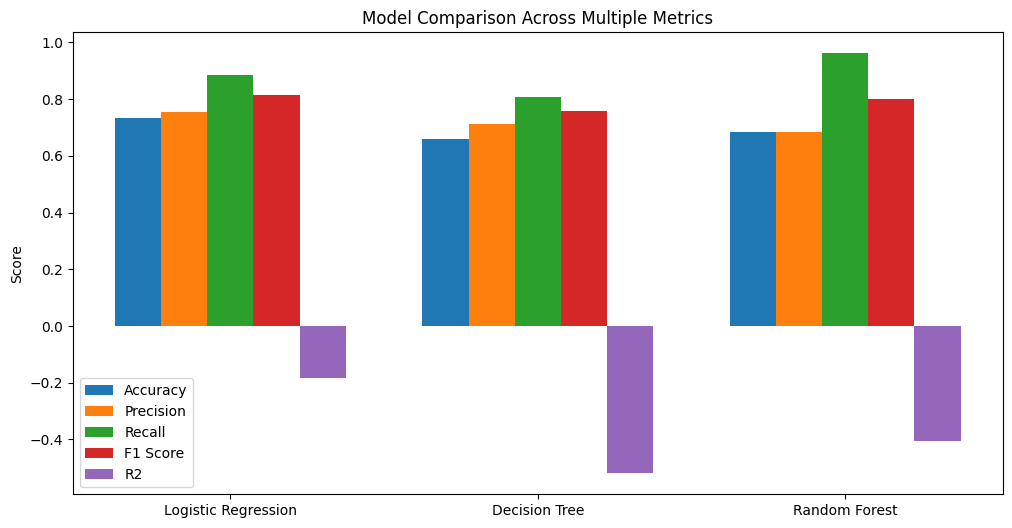

In [35]:
import matplotlib.pyplot as plt
import numpy as np

metrics = results_df.columns
x = np.arange(len(results_df.index))
width = 0.15

plt.figure(figsize=(12,6))

for i, metric in enumerate(metrics):
    plt.bar(x + i*width, results_df[metric], width, label=metric)

plt.xticks(x + width*2, results_df.index)
plt.ylabel("Score")
plt.title("Model Comparison Across Multiple Metrics")
plt.legend()
plt.show()